**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
  - 2.1. [Basic Edgeworth box](#toc2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [60]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [61]:
from ExchangeEconomy import ExchangeEconomyClass

### 2.1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

In [62]:
model = ExchangeEconomyClass()
N=100


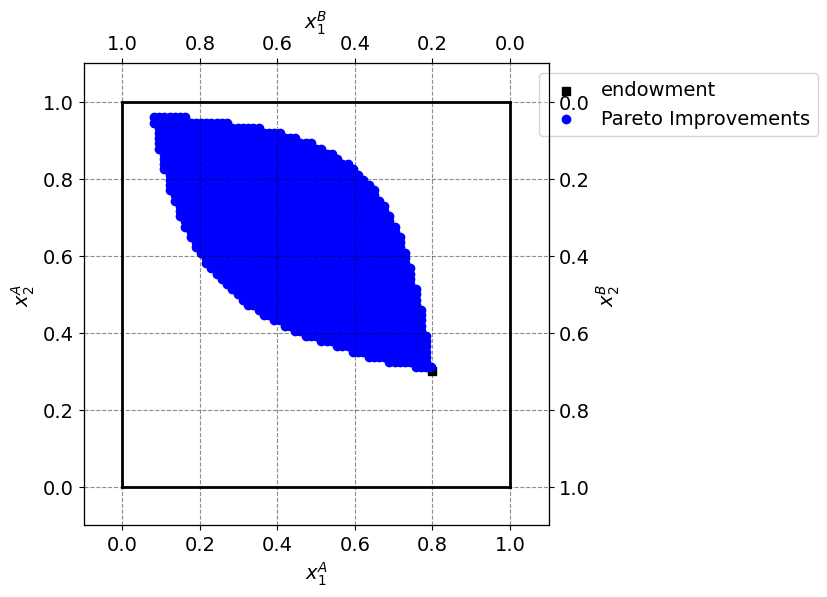

In [63]:
# Corrected code based on the provided snippet for the assignment

import matplotlib.pyplot as plt
from types import SimpleNamespace
from scipy import optimize
import numpy as np

# Update matplotlib settings for grid and font size
plt.rcParams.update({
    "axes.grid": True,
    "grid.color": "black",
    "grid.alpha": 0.25,
    "grid.linestyle": "--"
})
plt.rcParams.update({'font.size': 14})


# Example of using the model class and plotting the Edgeworth box
model = ExchangeEconomyClass()

# Setup for Edgeworth box plot
par = model.par

# Grid seacrh

# Define the grid
N = 75  # Number of points in each dimension
x1A_grid = np.linspace(0, par.w1A + par.w1B, N)
x2A_grid = np.linspace(0, par.w2A + par.w2B, N)

# Prepare for Pareto improvement search
pareto_improvements = []

# Initial utilities with endowments
initial_utility_A = model.utility_A(par.w1A, par.w2A)
initial_utility_B = model.utility_B(par.w1B, par.w2B)

# Grid search for Pareto improvements
for x1A in x1A_grid:
    for x2A in x2A_grid:
        # Calculate remaining goods for B
        x1B = par.w1A + par.w1B - x1A
        x2B = par.w2A + par.w2B - x2A
        
        # Ensure allocations are non-negative
        if x1B >= 0 and x2B >= 0:
            utility_A = model.utility_A(x1A, x2A)
            utility_B = model.utility_B(x1B, x2B)
            
            # Check for Pareto improvement
            if utility_A >= initial_utility_A and utility_B >= initial_utility_B:
                pareto_improvements.append((x1A, x2A))

# Total endowment
w1bar = 1.0
w2bar = 1.0

# Figure setup
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting endowment for A
ax_A.scatter(par.w1A, par.w2A, marker='s', color='black', label='endowment')

# Plot limits
w1bar = 1.0
w2bar = 1.0

ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

# Adding Pareto improvements scatter plot
ax_A.scatter(np.array(pareto_improvements)[:, 0], np.array(pareto_improvements)[:, 1], color='blue', label='Pareto Improvements')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))

plt.show()